# **Task 1**

Prepare a complete data analysis report on the given data.

In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
data=pd.read_csv("players_20.csv")

In [4]:
#saving a copy for later
data_copy = data.copy()

## **Basic Checks**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [6]:
data.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [7]:
data.shape

(18278, 104)

In [8]:
data.duplicated().sum()

0

In [9]:
# Converting the following categorical columns into numerical since those columns have numerical values

In [10]:
def convert_to_sum(value):
    try:
        parts = value.split('+')
        return sum(map(int, parts))
    except:
        return None

columns_to_apply = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

for column in columns_to_apply:
    data[column] = data[column].apply(convert_to_sum)

In [11]:
pd.set_option("display.max_rows",None)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sofifa_id,18278.0,2.197389e+05,2.796020e+04,768.0,204445.50,226165.0,240795.75,252905.0
age,18278.0,2.528329e+01,4.656964e+00,16.0,22.00,25.0,29.00,42.0
height_cm,18278.0,1.813622e+02,6.756961e+00,156.0,177.00,181.0,186.00,205.0
weight_kg,18278.0,7.527634e+01,7.047744e+00,50.0,70.00,75.0,80.00,110.0
overall,18278.0,6.624499e+01,6.949953e+00,48.0,62.00,66.0,71.00,94.0
potential,18278.0,7.154689e+01,6.139669e+00,49.0,67.00,71.0,75.00,95.0
value_eur,18278.0,2.484038e+06,5.585481e+06,0.0,325000.00,700000.0,2100000.00,105500000.0
wage_eur,18278.0,9.456943e+03,2.135171e+04,0.0,1000.00,3000.0,8000.00,565000.0
international_reputation,18278.0,1.103184e+00,3.788605e-01,1.0,1.00,1.0,1.00,5.0
weak_foot,18278.0,2.944250e+00,6.646562e-01,1.0,3.00,3.0,3.00,5.0


## **EDA - Exploratory Data Analysis**

### **Univariate Analysis**

In [12]:
#  !pip install sweetviz

In [13]:
#  import sweetviz as sv
#  my_report = sv.analyze(data)
#  my_report.show_html()

### **Bivariate Analysis**

In [14]:
data.drop(['sofifa_id','player_url','player_positions','long_name','dob','body_type','real_face','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_jersey_number','player_traits'], axis=1, inplace=True)

In [15]:
# separating numerical columns and categorical columns for bivariate analysis

In [16]:
num_data=data.select_dtypes(include=["int64","float64"])
num_data.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking',

In [17]:
cat_data=data.select_dtypes(include=['O'])
cat_data.columns

Index(['short_name', 'nationality', 'club', 'preferred_foot', 'work_rate',
       'team_position', 'nation_position'],
      dtype='object')

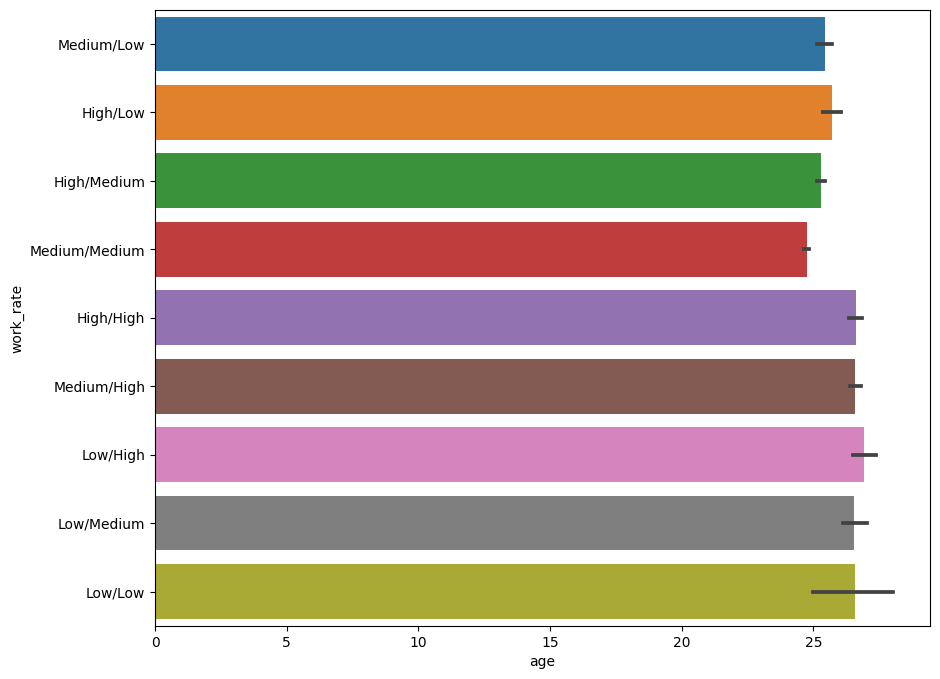

In [18]:
plt.figure(figsize=(10, 8))
sns.barplot(x='age', y='work_rate', data=data)
plt.show()

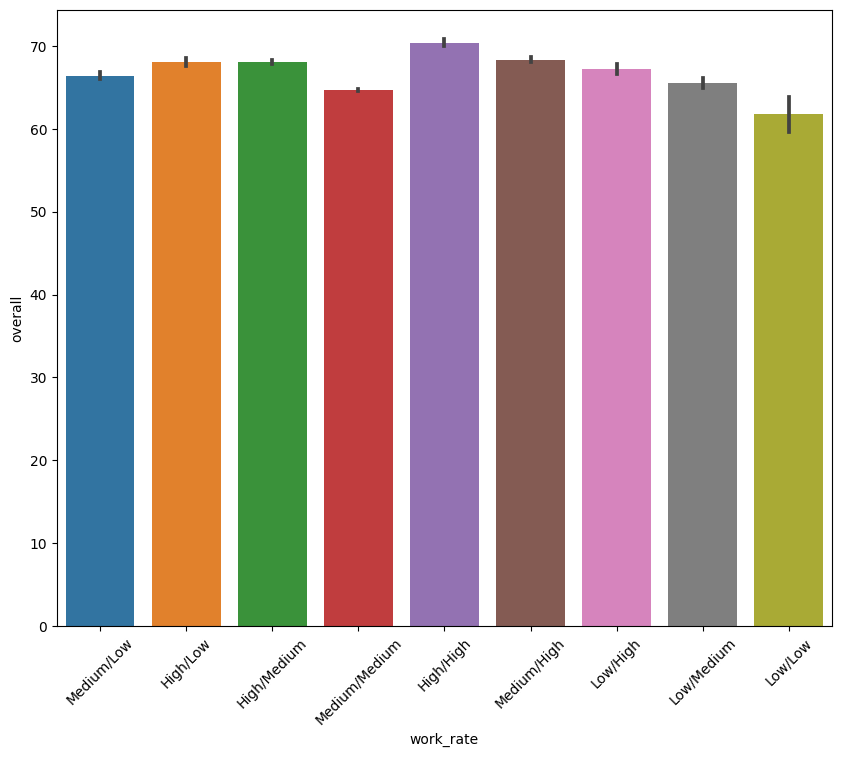

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(x='work_rate', y='overall', data=data)
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'potential')

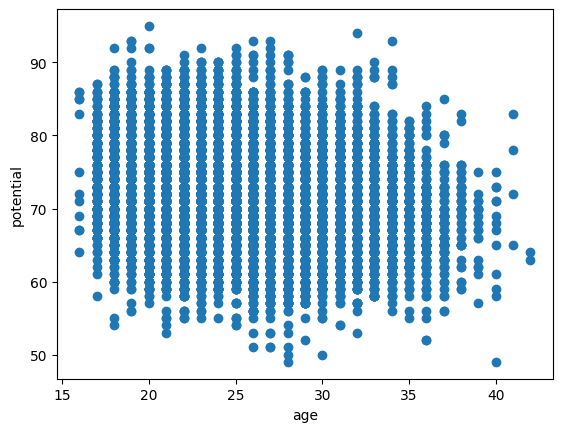

In [20]:
plt.scatter(data['age'], data['potential'])
plt.xlabel('age')
plt.ylabel('potential')

Text(0.5, 0, 'age')

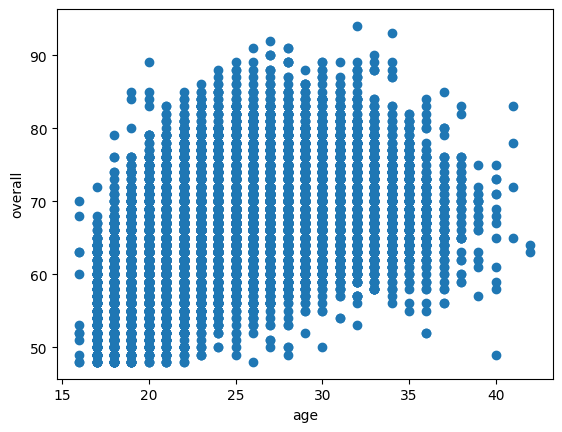

In [21]:
plt.scatter(data['age'], data['overall'])
plt.ylabel('overall')
plt.xlabel('age')

Text(0, 0.5, 'physic')

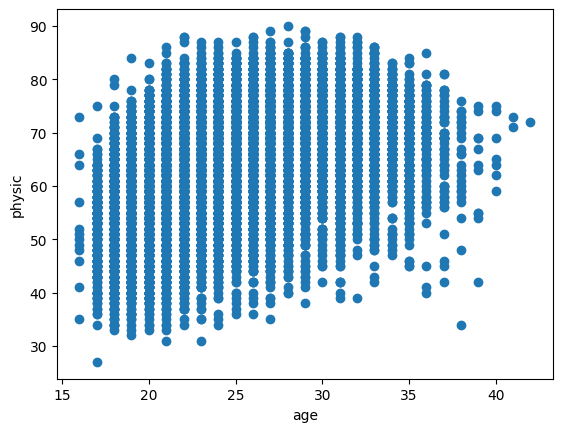

In [23]:
plt.scatter(data['age'], data['physic'])
plt.xlabel('age')
plt.ylabel('physic')

Text(0, 0.5, 'wage_eur')

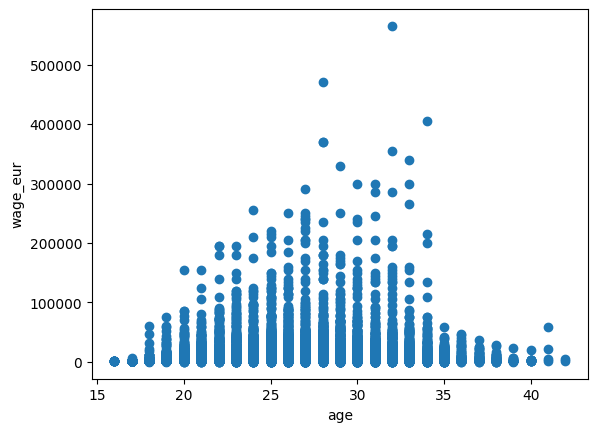

In [ ]:
plt.scatter(data['age'], data['wage_eur'])
plt.xlabel('age')
plt.ylabel('wage_eur')

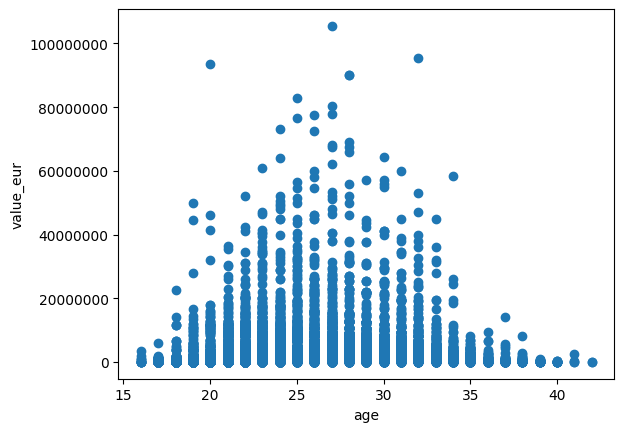

In [ ]:
plt.scatter(data['age'], data['value_eur'])
plt.xlabel('age')
plt.ylabel('value_eur')
plt.ticklabel_format(style='plain', axis='y')

Text(0, 0.5, 'wage_eur')

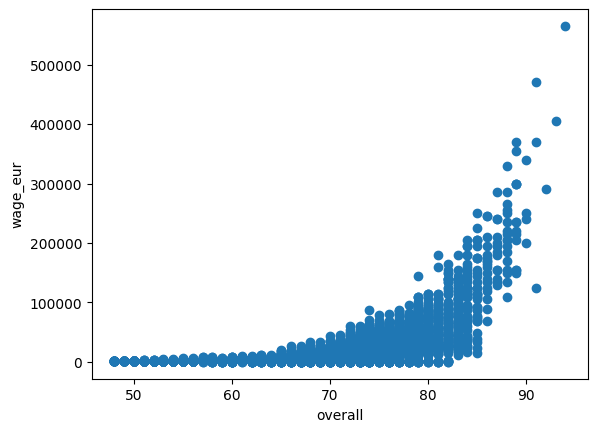

In [ ]:
plt.scatter(data['overall'], data['wage_eur'])
plt.xlabel('overall')
plt.ylabel('wage_eur')

## **Report**

**From the data.describe insights**
*   It contains 18,278 player records
*   The players' ages range from 16 to 42, with an average age of approximately 25 years.
* The Average height of players is around 181 cm
* The potential ratings range from 49 to 95, with an average potential rating of 71.
* Average player wage in euros is approximately 9,457, with a range from 0 to 565,000 euros.
* Player overall ratings range from 48 to 94, with an average rating of 66.
* The release clause in euros varies widely, with an average of approximately 4,740,717 euros.
* Most players have a weak foot rating of 3 and a skill moves rating of 2.

**from Univariate Analysis generated using Sweetviz insights**


* Weight : We can see most of the players weights are between 70 to 80 in kg
* Preferred_foor : About 76% of players preferred foot is right and others are left
* International Reputation : About 92% of players are having their reputation as 1 out of 5
* Work rate : About 50% of players work rate is medium/medium
* Team_positions : about 43% of players are in SUB position which stands for "Substitute"

**from Bivariate Analysis Insights**
* As a player gets older, their potential tends to decline. In other words, the younger a player is, the more room they have to grow and develop their skills.

* When a player's overall skills improve, it often leads to an increase in their wage. In simple terms, the better a player becomes, the more they're usually paid.

* Players who are between the ages of 25 and 30 tend to have higher values in terms of both their market value (value_eur) and their wages. So, this is typically the age range when players are more valuable in the market and earn higher salaries.

* Players in the age range of 25 to 35 tend to have better physical attributes compared to players outside this age range. This suggests that physical prowess is often at its peak during these years in a player's career.


# **Task 2**

Explore football skills and cluster football players based on their attributes.

## **Data Preprocessing**

### **Handling missing values**


In [ ]:
null_counts=data.isnull().sum()
significant_null_columns = null_counts[null_counts > 0]

print("\nColumns with significant null values with percentage:")
print((significant_null_columns/len(data))*100)


Columns with significant null values with percentage:
release_clause_eur     7.101433
team_position          1.313054
nation_position       93.839589
pace                  11.139074
shooting              11.139074
passing               11.139074
dribbling             11.139074
defending             11.139074
physic                11.139074
gk_diving             88.860926
gk_handling           88.860926
gk_kicking            88.860926
gk_reflexes           88.860926
gk_speed              88.860926
gk_positioning        88.860926
ls                    11.139074
st                    11.139074
rs                    11.139074
lw                    11.139074
lf                    11.139074
cf                    11.139074
rf                    11.139074
rw                    11.139074
lam                   11.139074
cam                   11.139074
ram                   11.139074
lm                    11.139074
lcm                   11.139074
cm                    11.139074
rcm              

In [ ]:
total_rows = len(data)
columns_above_80per_null = null_counts[null_counts / total_rows > 0.8]

print("\nColumns with null values above 80%:")
print(columns_above_80per_null.index.tolist())


Columns with null values above 80%:
['nation_position', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']


In [ ]:
# dropping columns which have most missing values that is above 80%
columns_to_drop = ['nation_position', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']

data = data.drop(columns=columns_to_drop)

In [ ]:
# now we handle missing values in dataset which is less than 80%
null_counts = data.isnull().sum()
cols_below_80per_null = null_counts[null_counts > 0]

print("\nColumns with missing values below 80%:")
print(cols_below_80per_null.index.tolist())


Columns with missing values below 80%:
['release_clause_eur', 'team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']


In [ ]:
# we separate columns which is numerical and categorical
# to impute mean, median and mode values missing in these columns

column_names = ['release_clause_eur', 'team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

numerical_columns = []
categorical_columns = []

for column in column_names:
    if column in data.columns:  # Check if the column exists in the DataFrame
        data_type = data[column].dtype
        if pd.api.types.is_numeric_dtype(data_type):
            numerical_columns.append(column)
        else:
            categorical_columns.append(column)
    else:
        print(f"Warning: Column '{column}' not found in the DataFrame.")

print("Numerical Columns:")
print(numerical_columns)

print("Categorical Columns:")
print(categorical_columns)


Numerical Columns:
['release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
Categorical Columns:
['team_position']


In [ ]:
columns_to_fill_with_median = ['release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']


for column in columns_to_fill_with_median:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)


columns_to_fill_with_mode = ['team_position']

for column in columns_to_fill_with_mode:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

In [ ]:
# successfully handled missing values

In [ ]:
# we dropped some columns so again separating numerical columns and categorical columns

In [ ]:
num_data=data.select_dtypes(include=["int64","float64"])
num_data.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       

In [ ]:
cat_data=data.select_dtypes(include=['O'])
cat_data.columns

Index(['short_name', 'nationality', 'club', 'preferred_foot', 'work_rate',
       'team_position'],
      dtype='object')

### **Outlier Handling**

Percentage of outliers in age: 0.10%
Percentage of outliers in height_cm: 0.49%
Percentage of outliers in weight_kg: 0.40%
Percentage of outliers in overall: 0.83%
Percentage of outliers in potential: 0.79%
Percentage of outliers in value_eur: 13.74%
Percentage of outliers in wage_eur: 12.91%
Percentage of outliers in international_reputation: 8.12%
Percentage of outliers in weak_foot: 37.92%
Percentage of outliers in skill_moves: 0.27%


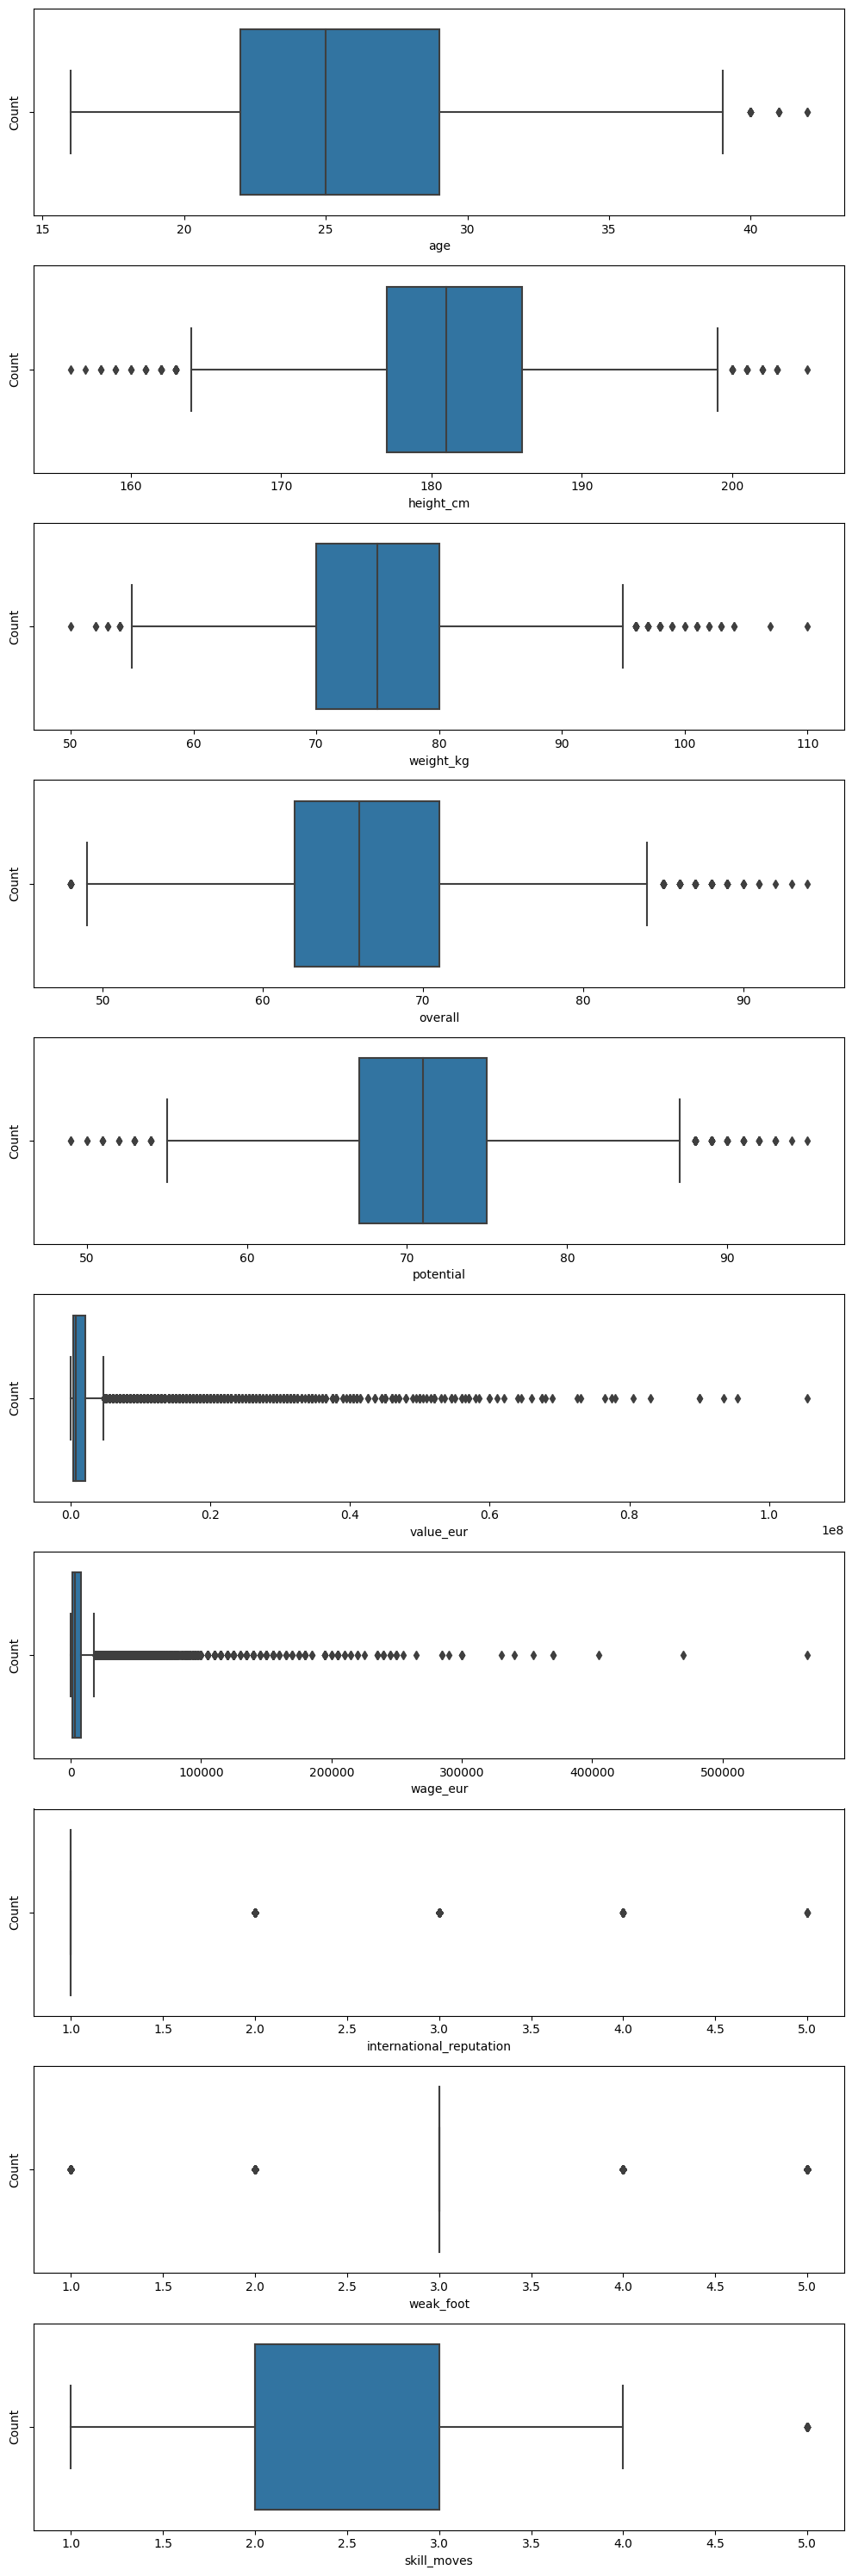

In [ ]:

threshold = 1.5

plt.figure(figsize=(10, 30), facecolor='white')
plotnumber = 1
outlier_percentages = {}

for column in num_data:
    if plotnumber <= 10:
        ax = plt.subplot(10, 1, plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)


        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
        outlier_percentage = (len(outliers) / len(data)) * 100

        outlier_percentages[column] = outlier_percentage

    plotnumber += 1

plt.tight_layout()

for column, percentage in outlier_percentages.items():
    print(f"Percentage of outliers in {column}: {percentage:.2f}%")


In [ ]:
# we handle outliers if the value is below 5%
# since there are 6 columns below 5% and even below 1% so we just leave it as it is

### **Scaling**

In [ ]:
# scaling all the numerical columns with standard scaler for better perfomance in K-Means

In [ ]:
num_data.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
data[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']] = scaling.fit_transform(data[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']])

In [ ]:
data.head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,1.442333,-1.681598,-0.464891,Argentina,FC Barcelona,3.993662,3.657156,16.653625,26.019375,Left,10.285902,1.588459,2.133237,Medium/Low,17.930323,RW,1.797291,2.985337,3.533915,3.431395,-0.839656,0.108417,2.089048,2.521670,1.020116,2.265238,2.552950,2.187351,2.479269,2.942162,2.573203,2.242225,1.775056,1.319040,1.991837,3.639424,2.193028,2.087565,0.257408,0.756079,0.220611,2.442165,-0.447066,-0.307108,2.241961,2.894270,1.694500,3.154006,-0.689317,-0.492949,-0.924093,-0.596066,-0.315057,-0.073010,-0.138191,-0.482875,3.589302,3.589302,3.589302,3.626188,3.661942,3.661942,3.661942,3.626188,3.672747,3.672747,3.672747,3.674207,3.440151,3.440151,3.440151,3.674207,1.232168,0.948368,0.948368,0.948368,1.232168,0.692409,-0.329151,-0.329151,-0.329151,0.692409
1,Cristiano Ronaldo,1.871809,0.834394,1.095935,Portugal,Juventus,3.849772,3.494276,10.029126,18.525626,Right,10.285902,1.588459,3.440398,High/Low,8.623573,LW,2.078786,3.060892,2.514934,2.710185,-1.097045,1.411769,1.870766,2.470634,2.110319,1.652128,2.496457,1.764710,1.827892,1.909646,1.589341,2.003296,1.642094,1.790504,1.586650,3.748889,0.503026,2.762951,2.519902,1.380396,1.018411,2.390410,0.419101,-0.836584,2.292999,2.034379,2.331132,3.069835,-0.938188,-0.724591,-1.018357,-0.539688,-0.315057,-0.073010,-0.138191,-0.316556,3.935264,3.935264,3.935264,3.304292,3.446979,3.446979,3.446979,3.304292,3.238449,3.238449,3.238449,3.330608,2.839900,2.839900,2.839900,3.330608,0.997904,0.531892,0.531892,0.531892,0.997904,0.582050,-0.149407,-0.149407,-0.149407,0.582050
2,Neymar Jr,0.368643,-0.941600,-1.032464,Brazil,Paris Saint-Germain,3.705883,3.331397,18.444030,13.139495,Right,10.285902,3.093037,3.440398,High/Medium,17.874089,CAM,2.172618,2.456452,3.024425,3.328365,-1.290087,-0.760485,2.034477,2.113383,0.561083,1.924621,2.496457,2.134521,2.207862,2.540628,1.851704,2.182493,1.974500,1.655800,2.194431,3.311030,1.418444,1.637308,-0.329165,1.130669,-1.295210,1.924615,-0.273833,-0.499645,1.884700,2.607640,2.649447,2.985664,-0.987962,-1.002561,-0.782698,-0.426933,-0.432729,-0.073010,-0.079834,-0.316556,3.128019,3.128019,3.128019,3.411591,3.339497,3.339497,3.339497,3.411591,3.455598,3.455598,3.455598,3.445141,2.959950,2.959950,2.959950,3.445141,1.115036,0.531892,0.531892,0.531892,1.115036,0.582050,-0.778511,-0.778511,-0.778511,0.582050
3,J. Oblak,0.153905,0.982394,1.663508,Slovenia,Atlético Madrid,3.561993,3.494276,13.430896,5.411566,Right,5.006771,0.083880,-1.788246,Medium/Medium,15.015520,GK,0.108319,0.114250,0.069380,0.134438,0.254249,0.108417,-2.003744,-1.765341,-2.135734,-1.072807,-1.684020,-2.303208,-1.863250,-1.646800,-0.837519,-1.700093,-1.416047,-0.297410,0.236027,2.873171,-1.046142,0.061408,1.095369,-1.366597,1.018411,-1.801743,-1.255488,-1.317926,-1.994140,0.816199,-2.379943,0.797206,-0.987962,-1.651158,-1.301147,3.970509,4.450641,3.719153,4.296909,4.007736,0.014360,0.014360,0.014360,0.085332,0.115044,0.115044,0.115044,0.085332,0.089786,0.089786,0.089786,0.123688,0.078744,0.078744,0.078744,0.123688,0.06084

### **Converting Categorical into Numerical**

In [ ]:
# except column 'preferred_foot' and 'work_rate' other columns doesn't have unique values
# so we convert those columns in to categorical

In [ ]:

for column in cat_data.drop(['club','short_name','nationality','team_position'],axis=1):
    unique_values = cat_data[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")


Unique values in 'preferred_foot':
['Left' 'Right']


Unique values in 'work_rate':
['Medium/Low' 'High/Low' 'High/Medium' 'Medium/Medium' 'High/High'
 'Medium/High' 'Low/High' 'Low/Medium' 'Low/Low']




In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['work_rate'] = label_encoder.fit_transform(data['work_rate'])

data['preferred_foot'] = data['preferred_foot'].map({'Left': 0, 'Right': 1})



In [ ]:
data.head(3)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,1.442333,-1.681598,-0.464891,Argentina,FC Barcelona,3.993662,3.657156,16.653625,26.019375,0,10.285902,1.588459,2.133237,7,17.930323,RW,1.797291,2.985337,3.533915,3.431395,-0.839656,0.108417,2.089048,2.521670,1.020116,2.265238,2.552950,2.187351,2.479269,2.942162,2.573203,2.242225,1.775056,1.319040,1.991837,3.639424,2.193028,2.087565,0.257408,0.756079,0.220611,2.442165,-0.447066,-0.307108,2.241961,2.894270,1.694500,3.154006,-0.689317,-0.492949,-0.924093,-0.596066,-0.315057,-0.07301,-0.138191,-0.482875,3.589302,3.589302,3.589302,3.626188,3.661942,3.661942,3.661942,3.626188,3.672747,3.672747,3.672747,3.674207,3.440151,3.440151,3.440151,3.674207,1.232168,0.948368,0.948368,0.948368,1.232168,0.692409,-0.329151,-0.329151,-0.329151,0.692409
1,Cristiano Ronaldo,1.871809,0.834394,1.095935,Portugal,Juventus,3.849772,3.494276,10.029126,18.525626,1,10.285902,1.588459,3.440398,1,8.623573,LW,2.078786,3.060892,2.514934,2.710185,-1.097045,1.411769,1.870766,2.470634,2.110319,1.652128,2.496457,1.764710,1.827892,1.909646,1.589341,2.003296,1.642094,1.790504,1.586650,3.748889,0.503026,2.762951,2.519902,1.380396,1.018411,2.390410,0.419101,-0.836584,2.292999,2.034379,2.331132,3.069835,-0.938188,-0.724591,-1.018357,-0.539688,-0.315057,-0.07301,-0.138191,-0.316556,3.935264,3.935264,3.935264,3.304292,3.446979,3.446979,3.446979,3.304292,3.238449,3.238449,3.238449,3.330608,2.839900,2.839900,2.839900,3.330608,0.997904,0.531892,0.531892,0.531892,0.997904,0.582050,-0.149407,-0.149407,-0.149407,0.582050
2,Neymar Jr,0.368643,-0.941600,-1.032464,Brazil,Paris Saint-Germain,3.705883,3.331397,18.444030,13.139495,1,10.285902,3.093037,3.440398,2,17.874089,CAM,2.172618,2.456452,3.024425,3.328365,-1.290087,-0.760485,2.034477,2.113383,0.561083,1.924621,2.496457,2.134521,2.207862,2.540628,1.851704,2.182493,1.974500,1.655800,2.194431,3.311030,1.418444,1.637308,-0.329165,1.130669,-1.295210,1.924615,-0.273833,-0.499645,1.884700,2.607640,2.649447,2.985664,-0.987962,-1.002561,-0.782698,-0.426933,-0.432729,-0.07301,-0.079834,-0.316556,3.128019,3.128019,3.128019,3.411591,3.339497,3.339497,3.339497,3.411591,3.455598,3.455598,3.455598,3.445141,2.959950,2.959950,2.959950,3.445141,1.115036,0.531892,0.531892,0.531892,1.115036,0.582050,-0.778511,-0.778511,-0.778511,0.582050


## **Model Building**

In [ ]:
data.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'release_clause_eur', 'team_position', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', '

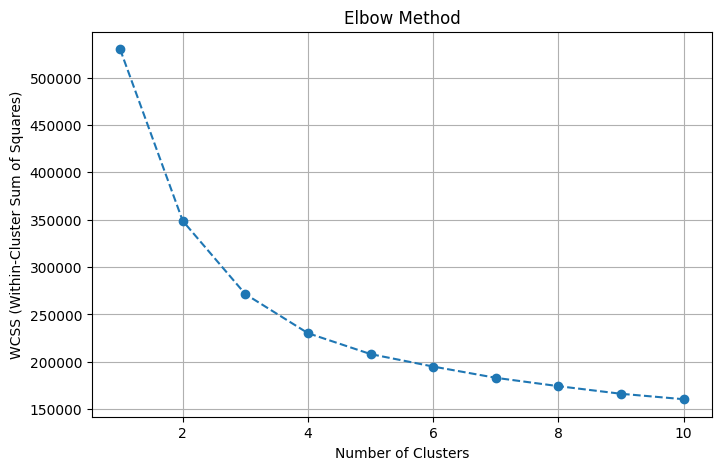

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


selected_attributes = [
    'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'pace', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_composure',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
    'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
]

player_attributes = data[selected_attributes]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(player_attributes)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


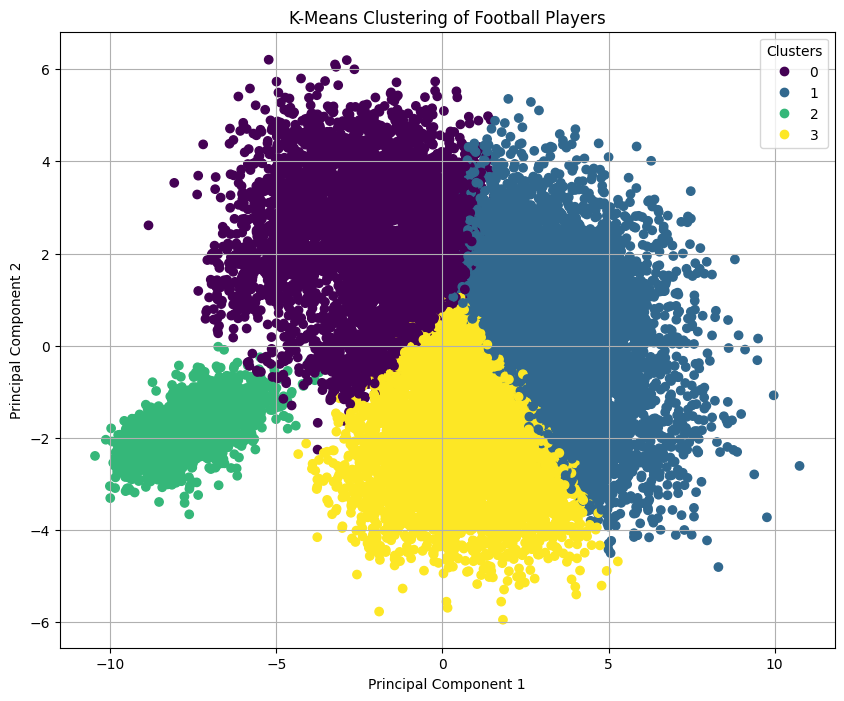

In [ ]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(player_attributes)

data['Cluster'] = cluster_labels

pca = PCA(n_components=2)
reduced_attributes = pca.fit_transform(player_attributes)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_attributes[:, 0], reduced_attributes[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering of Football Players')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(player_attributes, cluster_labels)
print(f"Silhouette Score: {silhouette_avg }")


Silhouette Score: 0.2464730200816088


## **Report**

# **Task 3**

In [ ]:
data_copy.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


Prepare a rank ordered list of top 10 countries with most players.

In [ ]:
top_countries = data_copy['nationality'].value_counts().head(10)
print("Top 10 countries with the most players:")
print(top_countries)


Top 10 countries with the most players:
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64


Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

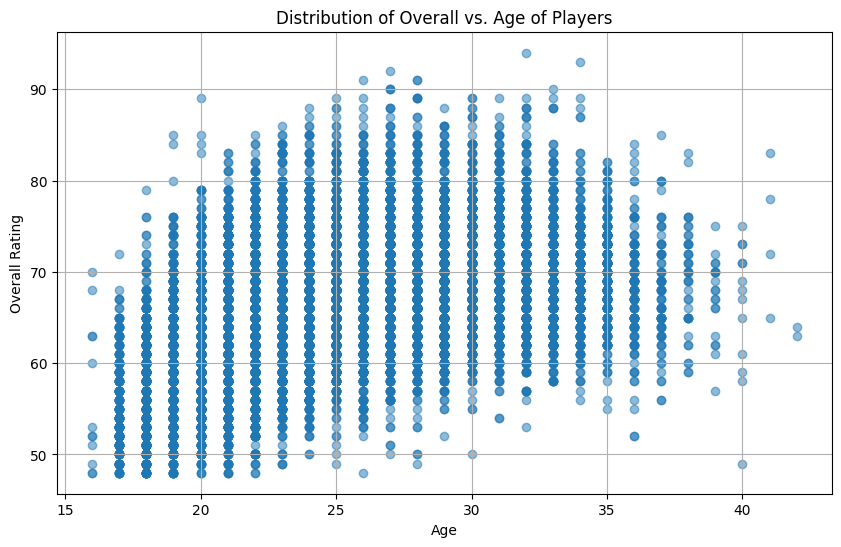

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_copy['age'], data_copy['overall'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Distribution of Overall vs. Age of Players')
plt.grid(True)
plt.show()


*   From the above Plot we can clearly see after the age of 35 their overall skill decreases





Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?

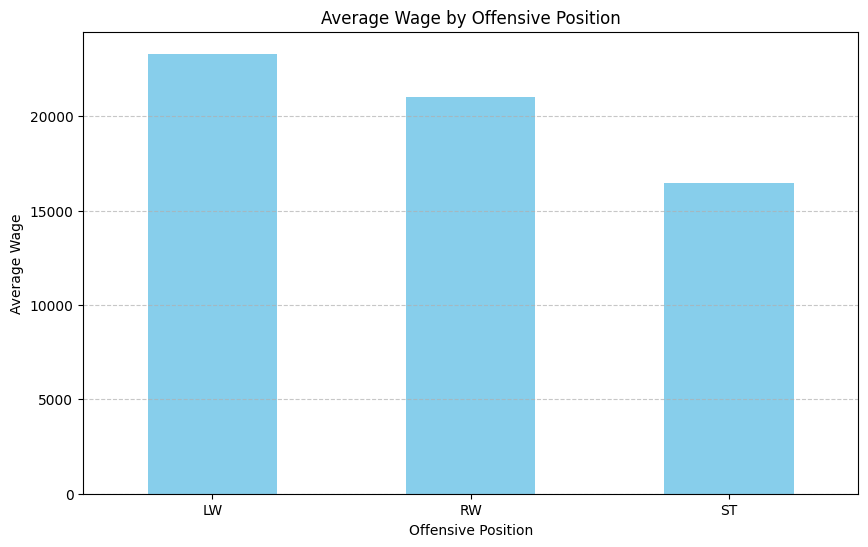

In [ ]:
offensive_positions = ['ST', 'RW', 'LW']
offensive_players = data_copy[data_copy['team_position'].isin(offensive_positions)]

average_wage_by_position = offensive_players.groupby('team_position')['wage_eur'].mean()

plt.figure(figsize=(10, 6))
average_wage_by_position.plot(kind='bar', color='skyblue')
plt.title("Average Wage by Offensive Position")
plt.xlabel("Offensive Position")
plt.ylabel("Average Wage")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


*   From the above bar graph we can see that LW which is Left-winger tends to get paid the most
